# TO DO LIST (2/23)

- 이상치 처리 : 재원
    - 너무 튀는 애들만 확인해보고 처리
- 중복값 처리 : 재원
    - order id는 같은데 payment_sequential이 같으면 버리기 (행 병합)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

pd.set_option('display.max_columns', None)

In [3]:
raw = pd.read_csv("/content/drive/MyDrive/BOAZ_mini_prj/Brazilian_Customer.csv")

## 데이터 살펴보기

- Olist ; 쿠팡같은 이커머스 회사
- Olist에 입점한 여러 상품들의 데이터

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [ ]:
raw.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,b46f1e34512b0f4c74a72398b03ca788,4,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,dc90f19c2806f1abba9e72ad3c350073,5,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP


In [ ]:
raw.shape
# 39 열 117,329 행

(117329, 39)


#### 컬럼 설명

- order_id  
- customer_id  
- order_status : 주문 상태
- order_purchase_timestamp : 주문 (구매) 시간  
- order_approved_at : 결제 승인 타임스탬프를 표시합니다.  
- order_delivered_timestamp : 주문 게시 타임스탬프를 표시합니다. 물류 파트너에게 처리된 시점.  
- review_id   
- review_score  
- review_comment_title  
- review_comment_message  
- review_creation_date  
- review_answer_timestamp  
- payment_sequential : 고객은 하나 이상의 결제 수단으로 주문을 지불할 수 있습니다. 만약 그가 그렇게 한다면, 다음과 같은 순서가 만들어질 것이다. (⭐️???) 
- payment_type : 고객이 고른 결제 수단  
- payment_installments : 고객이 고른 할부 횟수  
- payment_value : 거래 가격(?) 가치(?) (⭐️???) 
- customer_unique_id  
- customer_zip_code_prefix :   
- customer_city  
- customer_state  
- order_item_id  
- product_id  
- seller_id  
- shipping_limit_date : 물류 파트너에게 주문을 처리하기 위한 판매자 발송 제한 날짜(?)  
- Price  
- freight_value : 품목 화물 가격 (주문에 품목이 두 개 이상 있는 경우 품목 간에 운임 가격이 분할됨) => 배송비 같은거인듯  
- product_catecory_name  
- product_name_length  
- product_description_length  
- product_photos_qty : 제품 게시 사진 수  
- product_weight_g : 제품의 그람(g) 수  
- product_length_cm  
- product_height_cm  
- product_width_cm  
- seller_zip_code_prefix  
- seller_city  
- seller_state  





In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           117329 non-null  object 
 1   customer_id                        117329 non-null  object 
 2   order_status                       117329 non-null  object 
 3   order_purchase_timestamp           117329 non-null  object 
 4   order_approved_at                  117314 non-null  object 
 5   order_delivered_carrier_date       116094 non-null  object 
 6   order_delivered_customer_date      114858 non-null  object 
 7   order_estimated_delivery_date      117329 non-null  object 
 8   review_id                          117329 non-null  object 
 9   review_score                       117329 non-null  int64  
 10  review_comment_title               13892 non-null   object 
 11  review_comment_message             4967

## EDA

#### 인덱스/수치형/명목형/시간 변수 나누기

In [4]:
# id 변수
id_col = ['order_id', 'customer_id', 'review_id', 'customer_unique_id', 'customer_zip_code_prefix',
          'order_item_id','product_id','seller_id','seller_zip_code_prefix']

# 수치형 변수
num_col = ['review_score','payment_sequential','payment_installments','payment_value',
           'price','freight_value','product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm']

# 시간형 변수
date_col = ['order_purchase_timestamp','order_approved_at','order_delivered_customer_date','review_creation_date',
            'review_answer_timestamp','shipping_limit_date','order_estimated_delivery_date',
            'order_delivered_carrier_date']

# 범주형 변수
obj_col = raw.drop(columns = num_col).drop(columns = id_col).drop(columns = date_col).columns


#### 결측치 확인

In [ ]:
# 결측치 확인 

print("< 각 열 별 결측수 >")
print()
for i in raw.columns:
    if raw[i].isnull().sum() != 0:
        print(i," : ",raw[i].isnull().sum())

< 각 열 별 결측수 >

order_approved_at  :  15
order_delivered_carrier_date  :  1235
order_delivered_customer_date  :  2471
review_comment_title  :  103437
review_comment_message  :  67650
product_category_name  :  1695
product_name_lenght  :  1695
product_description_lenght  :  1695
product_photos_qty  :  1695
product_weight_g  :  20
product_length_cm  :  20
product_height_cm  :  20
product_width_cm  :  20


review_comment_title, review_comment_message 에 많은 결측  
=> 아무래도 물건 샀다고 다 리뷰쓰는 것은 아니니..   
=> 리뷰 제목이랑 리뷰 코멘트 결측 수가 다른 건 왜일까  
</br>
✅ **우리의 분석 방향에 따라 결측처리 방법이 달라질 것 같음**

### 연속형 eda

### 이상점 확인 (Box Plot)

<ipython-input-14-bb0db219f2ed>:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


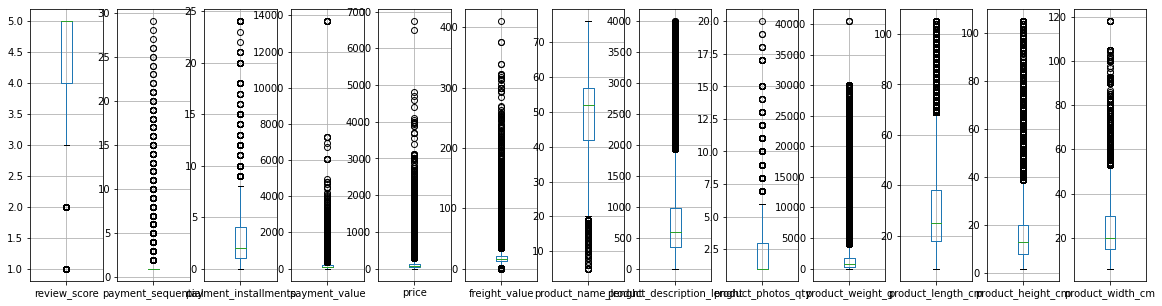

In [ ]:
col = num_col
fig, axes = plt.subplots(nrows=1, ncols=13)
for (i,j) in zip(col, range(0,13)):
    raw[num_col].boxplot(column=i, ax = axes[j])
plt.tight_layout()
fig.set_size_inches(20, 5)
plt.show()

### ✅ 좀 튀는 이상치들 -> 논리적 이상치 검토

🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑  
- review_score < 2.5  
- payment_value > 8000  
- price > 6000  
- freight_value > 350
- product_weight_gr > 40000
- product_width_cm > 110  

🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑 

#### 1. review_score < 2.5

In [11]:
raw[raw.review_score <= 2]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
9,019aaee09698daf81dcffe9d94a18b5c,e3893e579755de4feb1a4d0313c103fa,delivered,2017-08-10 14:04:58,2017-08-10 14:23:38,2017-08-11 13:52:35,2017-08-12 11:56:49,2017-08-23 00:00:00,43334848a48a7abf6faa2f8aba675b8a,2,NaN,tudo correu bem com a loja e com a entrega mas...,2017-08-13 00:00:00,2017-08-14 12:24:58,1,credit_card,2,83.69,cd6b577df45c00daa6b2767eaa947c72,13092,campinas,SP,1,b00a32a0b42fd65efb58a5822009f629,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-16 14:23:38,75.90,7.79,bebes,58.0,398.0,3.0,238.0,20.0,10.0,15.0,9350,maua,SP
128,9d7ecf49e46ed6b1d5caa034b87404a5,e3f00fa1b62f66c2a2165901f56e7be5,delivered,2018-08-02 14:14:32,2018-08-02 14:30:44,2018-08-03 15:46:00,2018-08-06 18:16:27,2018-08-07 00:00:00,afb6b942609ed1033530e06710458bed,2,talvez,"Quanto a compra faltou a opção da fragrância ,...",2018-08-07 00:00:00,2018-08-10 11:10:32,1,credit_card,5,126.23,d32f60c918b1433e64d5981961571163,30330,belo horizonte,MG,1,fbc1488c1a1e72ba175f53ab29a248e8,289cdb325fb7e7f891c38608bf9e0962,2018-08-06 14:30:14,116.90,9.33,perfumaria,27.0,311.0,1.0,560.0,19.0,13.0,17.0,31570,belo horizonte,SP
199,78037c5f4d9f1f7bab0207f22c4e92f1,ec8f2dcb080511771e52af7ca42117f5,delivered,2018-01-02 17:56:52,2018-01-02 18:10:14,2018-01-08 17:19:32,2018-01-16 17:12:37,2018-01-31 00:00:00,a541341d4f64a73f9270db7c7cf8bb23,2,NaN,NaN,2018-01-17 00:00:00,2018-01-20 18:37:32,1,credit_card,2,261.46,60a1e88691ef46c62b52fb2b994d7675,25850,paraiba do sul,RJ,1,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2018-01-08 18:10:14,117.90,12.83,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,24451,sao goncalo,RJ
200,78037c5f4d9f1f7bab0207f22c4e92f1,ec8f2dcb080511771e52af7ca42117f5,delivered,2018-01-02 17:56:52,2018-01-02 18:10:14,2018-01-08 17:19:32,2018-01-16 17:12:37,2018-01-31 00:00:00,a541341d4f64a73f9270db7c7cf8bb23,2,NaN,NaN,2018-01-17 00:00:00,2018-01-20 18:37:32,1,credit_card,2,261.46,60a1e88691ef46c62b52fb2b994d7675,25850,paraiba do sul,RJ,2,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2018-01-08 18:10:14,117.90,12.83,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,24451,sao goncalo,RJ
229,24cc891b9b356e89a45d5313bddf4607,b1dc05bae2f03544e45370080331bf07,delivered,2018-04-06 22:28:55,2018-04-06 22:49:04,2018-04-11 18:26:26,2018-05-21 17:38:35,2018-05-04 00:00:00,a9ee2d1e4f840d94f43289d693461a1f,2,NaN,"Péssimo , porém ainda não recebi meu produto...",2018-05-06 00:00:00,2018-05-10 02:03:41,1,credit_card,5,141.02,82b2b6a27479a25369741ff265a19a49,57084,maceio,AL,1,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2018-04-11 22:49:04,117.70,23.32,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,24451,sao goncalo,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,1c7fe02ac4c7be50c59afb295cf85b89,20a452f528d487411fd7d3ebda1d0f20,delivered,2018-01-26 13:22:09,2018-01-30 03:47:31,2018-02-09 13:17:44,2018-02-20 14:18:51,2018-03-12 00:00:00,42b3cd1634f9613559f38187611136d3,2,NaN,Uma cadeira veio faltando a parte do encosto.,2018-02-21 00:00:00,2018-02-21 18:09:14,1,boleto,1,257.50,31318a0597cd9d50ce4cfd03c80fe780,37540,santa rita do sapucai,MG,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-13 

In [17]:
print(raw[raw.review_score == 1].review_comment_message[54])

# 궁금해서 평점 1점 리뷰 코멘트 찍어봤는데 개웃김 ㅋㅋㅋㅋ
# "자동 응답기와 대화할 수 없다는 것이 소중합니다. 그저 멍청하고 무지한 기계일 뿐입니다.
# 커피 메이커의 펜스 키트와 필터를 보내주지 않으셨잖아요 그게 전부라면,"

Prezados que porcaria de atendimento ao cliente não se consegue falar com um atendente, só uma máquina burra e ignorante.
Vocês não me enviaram o kit de vedação da cafeteira e o filtro e se só isso n


In [20]:
# 배송 기간 변수 : delivery_period

raw["order_purchase_timestamp"] = pd.to_datetime(raw["order_purchase_timestamp"], format='%Y-%m-%d %H:%M:%S')
raw["order_delivered_customer_date"] = pd.to_datetime(raw["order_delivered_customer_date"], format='%Y-%m-%d %H:%M:%S')
raw["order_estimated_delivery_date"] = pd.to_datetime(raw["order_estimated_delivery_date"], format='%Y-%m-%d %H:%M:%S')


raw['delivery_period'] = raw['order_purchase_timestamp'] - raw['order_delivered_customer_date']
raw[raw.review_score <= 2].delivery_period

9         -2 days +02:08:09
54        -5 days +15:19:08
82       -10 days +20:08:49
87        -7 days +14:43:26
101       -8 days +09:48:15
                ...        
117308                  NaT
117309                  NaT
117310                  NaT
117319                  NaT
117325                  NaT
Name: delivery_period, Length: 18939, dtype: timedelta64[ns]

In [22]:
print("평점 3점 이상의 배송 기간 : ", np.mean(raw[raw.review_score > 2].delivery_period))
print("평점 2점의 배송 기간 : ", np.mean(raw[raw.review_score == 2].delivery_period))
print("평점 1점의 배송 기간 : ", np.mean(raw[raw.review_score == 1].delivery_period))

# 확실히 유의미한 차이 oo 
# 혹시 평점 2점 이하 행들에서 review comment에 배송 관련 단어가 있는지 확인하면 좋을듯

평점 3점 이상의 배송 기간 :  -12 days +15:26:47.619648205
평점 2점의 배송 기간 :  -16 days +03:47:03.485509105
평점 1점의 배송 기간 :  -20 days +10:43:29.608324440


🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑   
결론 : review_score 이상치는 논리적으로 이상이 없는 것 같다. 오히려 이 이상치가 예측에 더 도움이 될 것 같음  
🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑 

#### 2. payment_value > 8000

In [162]:
raw[raw.payment_value > 8000]
# 이것이 그 문제의 이상치들

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,delivery_period
112485,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,3667,sao paulo,SP,-19 days +21:02:23
112486,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,3667,sao paulo,SP,-19 days +21:02:23
112487,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,3667,sao paulo,SP,-19 days +21:02:23
112488,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,3667,sao paulo,SP,-19 days +21:02:23
112489,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,telefonia_fixa,39.0,2493.0,3.0,750.0,16.0,16.0,16.0,3667,sao paulo,SP,-19 days +21:02:23
112490,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,211fa81a22870cc634265ea85b751e40,1,NaN,"Peço por favor verificar a entrega do pedido, ...",2017-10-18 00:00:00,2017-10-19 13:10:39,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,6,5769ef0a23

🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑 

💁‍♀️ 다른거 다 같은데 order_item_id가 다름!!  
💁‍♀️ order_item_id : sequential number identifying number of items included in the same order.  
💁‍♀️ 아하... 한 주문에 다수의 item을 샀을 때 그걸 구분하는 item id 구나  
💁‍♀️ product_id가 같은 걸 보면, 아마도 한 번에 동일한 품목을 8개 산거같음!   
💁‍♀️ 그리고 동일한 항목을 여러개 샀으니까 price는 작은데 payment_value는 큰 거 였다!

</br>

**⭐️ 결론 : 정상데이터다!! 제거할 필요 없음 !!**

🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑   

<ipython-input-163-760a9417a215>:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


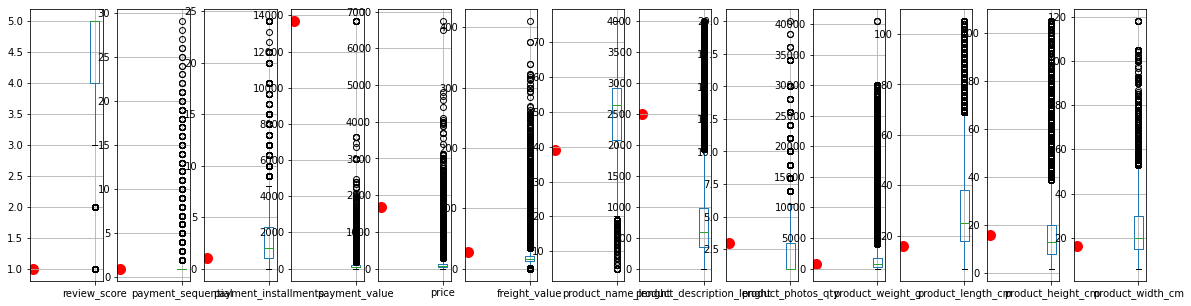

In [163]:
col = num_col
highlighted_row_index_1 = 112489
highlighted_row_data_1 = raw.iloc[highlighted_row_index_1, :]

fig, axes = plt.subplots(nrows=1, ncols=13)
for (i,j) in zip(col, range(0,13)):
    raw[num_col].boxplot(column=i, ax = axes[j])     
highlighted_row_index = raw[raw.payment_value > 8000].index

for (i,j) in zip(col, range(0,13)):
    axes[j].scatter(x = [i], y=highlighted_row_data_1[i], c= 'red', s=100)


plt.tight_layout()
fig.set_size_inches(20, 5)
plt.show()

#### 3. price > 6000

In [35]:
raw[raw.price > 6000]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,delivery_period
101372,f5136e38d1a14a4dbd87dff67da82701,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28,1b73e6c7cd135008ebeb18404b776ddc,5,NaN,NaN,2017-06-06 00:00:00,2017-06-07 19:35:23,1,boleto,1,6726.66,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,74210,goiania,GO,-12 days +01:04:46
114836,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,e2fbd9f0ef7b724c7ecb351601a857e7,5,NaN,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04 00:00:00,2017-03-04 21:40:41,1,credit_card,8,6929.31,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,3635,sao paulo,SP,-19 days +06:14:18


<ipython-input-70-8686837ced15>:15: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


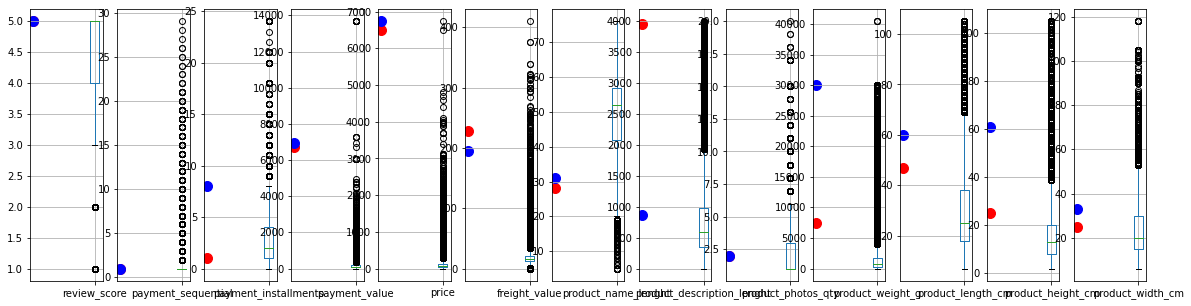

In [70]:
col = num_col
highlighted_row_index_1 = 101372
highlighted_row_data_1 = raw.iloc[highlighted_row_index_1, :]
highlighted_row_index_2 = 114836	
highlighted_row_data_2 = raw.iloc[highlighted_row_index_2, :]

fig, axes = plt.subplots(nrows=1, ncols=13)
for (i,j) in zip(col, range(0,13)):
    raw[num_col].boxplot(column=i, ax = axes[j])     
for (i,j) in zip(col, range(0,13)):
    axes[j].scatter(x = [i], y=highlighted_row_data_1[i], c= 'red', s=100)
for (i,j) in zip(col, range(0,13)):
    axes[j].scatter(x = [i], y=highlighted_row_data_2[i], c= 'blue', s=100)

plt.tight_layout()
fig.set_size_inches(20, 5)
plt.show()

🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑 

결론 : 흠... 정상적인 것 같은데?? 근데 두 점의 양상이 좀 비슷한 면이 있는 것 같긴하네 근데 이정도야 뭐.. 넣어도될듯? 오류는 아닌거같음!

🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑 

freight_value > 350
product_weight_gr > 40000
product_width_cm > 110

#### 4. freight_value > 350

In [71]:
raw[raw.freight_value > 350]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,delivery_period
97262,a77e1550db865202c56b19ddc6dc4d53,4eed76c1aafeceac4250e202ca9b1a5a,delivered,2018-04-16 14:57:21,2018-04-19 06:55:13,2018-04-19 18:32:29,2018-04-27 19:45:00,2018-05-17,0c8c455696a7872d5a7a1e7bc63b3097,5,NaN,NaN,2018-04-28 00:00:00,2018-05-01 03:00:55,1,credit_card,12,1388.68,97734fdca127fddcb5f92f841690c3f2,64770,sao raimundo nonato,PI,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.00,409.68,bebes,44.0,385.0,6.0,14675.0,55.0,64.0,52.0,86804,apucarana,PR,-12 days +19:12:21
109730,076d1555fb53a89b0ef4d529e527a0f6,f08306b95370e8d5f0d97b71229284b6,delivered,2018-07-30 10:04:21,2018-08-01 04:35:22,2018-08-02 15:04:00,2018-08-08 00:46:43,2018-08-14,b5d5c9ff159e7f437154c3a6c37a624d,4,aaa,OK,2018-08-08 00:00:00,2018-08-13 13:06:49,1,boleto,1,2713.36,f140f377d666848e3712b51a2734d120,87013,maringa,PR,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28,utilidades_domesticas,52.0,1910.0,4.0,30000.0,75.0,58.0,65.0,18030,sorocaba,SP,-9 days +09:17:38
109731,3fde74c28a3d5d618c00f26d51baafa0,f2c743697f9b2ff2902df23a16582d80,delivered,2018-08-13 14:07:50,2018-08-15 03:15:09,2018-08-15 08:53:00,2018-08-24 00:14:39,2018-09-05,a77aa47d62f78d2b3473dc9aa7611ac7,5,NaN,NaN,2018-08-25 00:00:00,2018-08-27 12:04:38,1,boleto,1,2713.36,5e92460d739e8dd987e279285a1d278c,88053,florianopolis,SC,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28,utilidades_domesticas,52.0,1910.0,4.0,30000.0,75.0,58.0,65.0,18030,sorocaba,SP,-11 days +13:53:11


In [72]:
prob_row = raw[raw.freight_value > 350]
prob_row['delivery_period']

# 음.. 운송값이 비싼 것 치고는 운송기간은 괜찮은 편인듯?

97262    -12 days +19:12:21
109730    -9 days +09:17:38
109731   -11 days +13:53:11
Name: delivery_period, dtype: timedelta64[ns]

In [73]:
prob_row.customer_zip_code_prefix

97262     64770
109730    87013
109731    88053
Name: customer_zip_code_prefix, dtype: int64

<ipython-input-76-1d81bf67a460>:19: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


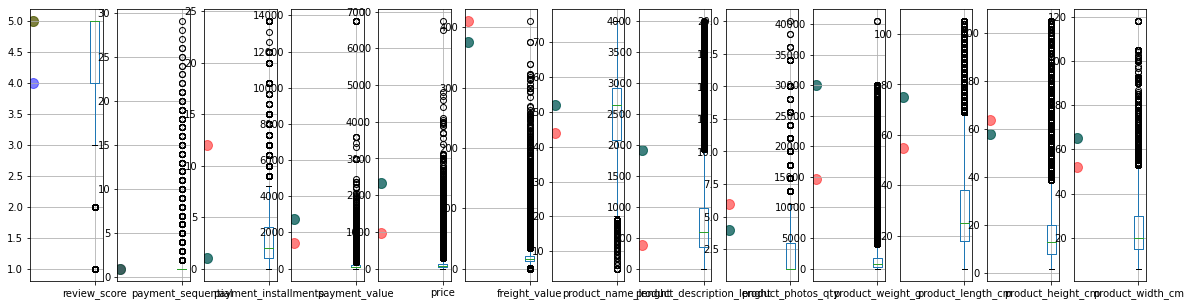

In [76]:
col = num_col
highlighted_row_index_1 = 97262
highlighted_row_data_1 = raw.iloc[highlighted_row_index_1, :]
highlighted_row_index_2 = 109730	
highlighted_row_data_2 = raw.iloc[highlighted_row_index_2, :]
highlighted_row_index_3 = 109731	
highlighted_row_data_3 = raw.iloc[highlighted_row_index_3, :]

fig, axes = plt.subplots(nrows=1, ncols=13)
for (i,j) in zip(col, range(0,13)):
    raw[num_col].boxplot(column=i, ax = axes[j])     
for (i,j) in zip(col, range(0,13)):
    axes[j].scatter(x = [i], y=highlighted_row_data_1[i], c= 'red', s=100, alpha = 0.5)
for (i,j) in zip(col, range(0,13)):
    axes[j].scatter(x = [i], y=highlighted_row_data_2[i], c= 'blue', s=100, alpha = 0.5)
for (i,j) in zip(col, range(0,13)):
    axes[j].scatter(x = [i], y=highlighted_row_data_3[i], c= 'green', s=100, alpha = 0.5)

plt.tight_layout()
fig.set_size_inches(20, 5)
plt.show()

지금 초록점과 파란점은 같은 product_id (동일상품). 원래 운송비가 비싼 상품인가 보오...  
막 이상한 건 없는듯 !!! 

#### 5. product_weight_gr > 40000
#### 6. product_width_cm > 110

In [79]:
raw[raw.product_weight_g > 40000]

# product_category_name : cama_mesa_banho	=>  bed_table_bathroom이란 뜻. 그래서 weight가 큰 듯. 이상 없는 듯!!

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,delivery_period
71753,4a45f9f66971302cf881ecfa142f42ba,ccd6a4af78390b7ae560c1cc1cb1a2ff,delivered,2017-12-23 19:03:24,2017-12-23 19:13:20,2017-12-28 15:13:58,2018-01-25 22:17:15,2018-01-29,62a35e9e362cf9b27b9ee8e047afbedf,1,NaN,NaN,2018-01-26 00:00:00,2018-01-27 00:42:30,1,credit_card,1,96.32,32d0420a22921ea161d8bff0e0297b71,88820,icara,SC,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-12-29 19:13:20,80.0,16.32,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,14940,ibitinga,SP,-34 days +20:46:09
71754,6ecf1a4051b4c5ed613624b460970a26,958279c23050d6207d196c3057648f6f,delivered,2017-11-17 08:40:57,2017-11-17 08:55:48,2017-11-17 20:36:56,2017-12-01 12:08:23,2017-12-06,13fe815dc5c4076ab42f34545df82ca1,5,NaN,NaN,2017-12-02 00:00:00,2017-12-04 16:04:31,1,credit_card,2,92.06,de00290d2a997f24e1706fdc2d366a0e,11730,mongagua,SP,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2017-11-23 08:55:48,80.0,12.06,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,14940,ibitinga,SP,-15 days +20:32:34
71755,9223919b300f6989e1715333fca0d6ce,51934b734e94e61d8efa4523e175c6c3,delivered,2018-03-01 23:05:31,2018-03-01 23:15:32,2018-03-02 22:33:58,2018-03-27 20:47:27,2018-03-26,1474903cd02494e327de0317af95d846,5,NaN,NaN,2018-03-28 00:00:00,2018-03-30 12:39:00,1,credit_card,1,96.32,4fbb5c68b6851f6e35c543f963b43e4c,86455,joaquim tavora,PR,1,26644690fde745fc4654719c3904e1db,1835b56ce799e6a4dc4eddc053f04066,2018-03-07 23:15:32,80.0,16.32,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0,14940,ibitinga,SP,-26 days +02:18:04


In [80]:
raw[raw.product_width_cm > 110]

# product_category_name : cama_mesa_banho	=>  bed_table_bathroom이란 뜻. 그래서 width가 큰 듯. 이상 없는 듯!!

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,delivery_period
28137,0a0090ae69392fa38ee742006f8c0a90,5b39c82ffd108c049f679ceed482f7e2,delivered,2017-08-11 21:59:05,2017-08-11 22:25:10,2017-08-14 14:58:03,2017-08-22 18:05:55,2017-08-31,0ffae99e57188428340c206afb957a1c,1,NaN,Marca como entregue 2 produtos....mas na reali...,2017-08-23 00:00:00,2017-08-26 05:13:02,1,credit_card,10,157.27,a7d9a3e447614288937ad2bba991676c,8120,sao paulo,SP,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,2017-08-16 22:25:10,85.5,9.91,cama_mesa_banho,56.0,502.0,3.0,1050.0,23.0,93.0,118.0,14940,ibitinga,SP,-11 days +03:53:10
28138,1a2442f225e9147e717dfaa6a93058d4,ec4e8c560d69abf146f76ff39823050d,delivered,2017-03-20 22:21:57,2017-03-20 22:21:57,2017-03-21 15:54:30,2017-03-24 10:50:15,2017-04-06,8e74ed552caeb1d7ef6e2d6adf5a406a,5,NaN,NaN,2017-03-25 00:00:00,2017-03-27 01:03:06,1,credit_card,4,80.77,231b15fc7a2d0b20ec277816e0385cda,4368,sao paulo,SP,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,2017-03-26 22:21:57,68.9,11.87,cama_mesa_banho,56.0,502.0,3.0,1050.0,23.0,93.0,118.0,14940,ibitinga,SP,-4 days +11:31:42
28139,e5c0d192e1f883b21e7673f73cb644b9,d876789fb19a51ded2bde79987b12bd5,delivered,2017-05-06 18:23:13,2017-05-06 18:35:13,2017-05-09 14:20:46,2017-05-16 10:07:30,2017-05-29,6dd40a0eff86451640c5acc229f7d2c4,5,NaN,NaN,2017-05-17 00:00:00,2017-06-26 00:21:58,1,credit_card,1,81.72,5f0e0a97623a857fcfceb2d71d042d1b,13568,sao carlos,SP,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,2017-05-11 18:31:53,68.9,12.82,cama_mesa_banho,56.0,502.0,3.0,1050.0,23.0,93.0,118.0,14940,ibitinga,SP,-10 days +08:15:43
28140,4ae136c7611e6052ec06035442490f24,8a86e15447c677ced975088dcee32e6a,delivered,2017-10-23 23:13:30,2017-10-23 23:28:07,2017-10-25 15:08:18,2017-11-22 16:40:00,2017-11-09,90988cd04fde47aa06f5d327ef3cd6e8,1,NaN,Ola estou muito descontente com o serviço o pr...,2017-11-11 00:00:00,2017-11-11 14:37:11,1,credit_card,2,99.12,ad585bf696fc252c06f084e8a2fbf784,8693,suzano,SP,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,2017-10-29 23:28:07,85.5,13.62,cama_mesa_banho,56.0,502.0,3.0,1050.0,23.0,93.0,118.0,14940,ibitinga,SP,-30 days +06:33:30
28141,e1000df659259b29cb73a4798ccd7454,feb21f4291037a45288a6266d66a0096,delivered,2017-01-18 23:02:45,2017-01-18 23:10:20,2017-01-19 15:02:12,2017-02-09 12:33:46,2017-02-28,386e3d3663fb7743c23d1287c1aaec67,5,NaN,NaN,2017-02-10 00:00:00,2017-02-11 21:05:11,1,credit_card,1,84.59,7bc7dbe918ad4e7bd68abd2479727ad6,22620,rio de janeiro,RJ,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,2017-01-22 23:02:45,68.9,15.69,cama_mesa_banho,56.0,502.0,3.0,1050.0,23.0,93.0,118.0,14940,ibitinga,SP,-22 days +10:28:59
28142,db6c6df011e1bcc8e03e81b23982a1dc,75c8873878785af64664ea575dc50c52,delivered,2017-05-11 12:10:03,2017-05-11 13:05:31,2017-05-15 11:13:22,2017-05-19 19:22:16,2017-05-31,decc3c1d8a6ebcf7f02fbbaae0b09051,3,NaN,"RECEBI APENAS O VARAO, NÃOI RECEBI A CORTINA. ...",2017-05-21 00:00:00,2017-05-24 15:01:23,1,credit_card,4,126.00,7e53420f2126366b3489c18314f82803,38414,uberlandia,MG,1,b17808303e15dd50538c011b44295427,4a3ca9315b744ce9f8e9374361493884,2017-05-17 13:05:31,68.9,17.49,cama_mesa_banho,56.0,502.0,3.0,1050.0,23.0,93.0,118.0,14940,ibitinga,SP,-9 days +16:47:47
28143,4f4ec4d17cddc9375

#### 결론
🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑

그냥 2번만 좀 처리하변 될듯

🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑🛑

### ✅ 동일한 order id에 payment_sequential도 같으면 버리기 (행 병합)

In [ ]:
unique_order = raw.order_id.value_counts()

In [107]:
unique_order_id = unique_order[unique_order.values >= 2].index
unique_order_id = list(unique_order_id)

In [102]:
df = raw.set_index('order_id')

In [149]:
asdf = df.loc[unique_order_id, ['payment_sequential']]
asdf['count'] = np.zeros((32196,1))

In [150]:
asdf

,payment_sequential,count
order_id,,
895ab968e7bb0d5659d16cd74cd1650c,17,0.0
895ab968e7bb0d5659d16cd74cd1650c,17,0.0
895ab968e7bb0d5659d16cd74cd1650c,1,0.0
895ab968e7bb0d5659d16cd74cd1650c,1,0.0
895ab968e7bb0d5659d16cd74cd1650c,13,0.0
...,...,...
22557cb9c7229669e351a8460240119b,1,0.0
fbd05af8c1751b972fc6e19b1190990e,2,0.0
fbd05af8c1751b972fc6e19b1190990e,1,0.0


In [152]:
pivot = pd.pivot_table(asdf, index = ['order_id','payment_sequential'], aggfunc = 'count')
pivot

count
order_id                         payment_sequential       
0008288aa423d2a3f00fcb17cd7d8719 1                       2
0016dfedd97fc2950e388d2971d718c7 1                       1
                                 2                       1
001ab0a7578dd66cd4b0a71f5b6e1e41 1                       3
001d8f0e34a38c37f7dba2a37d4eba8b 1                       2
...                                                    ...
ffd84ab39cd5e873d8dba24342e65c01 1                       2
ffe4b41e99d39f0b837a239110260530 1                       2
ffecd5a79a0084f6a592288c67e3c298 1                       3
fff8287bbae429a99bb7e8c21d151c41 1                       2
fffb9224b6fc7c43ebb0904318b10b5f 1                       4

[17142 rows x 1 columns]

💁‍♀️ 올 제법 많아; 17142 rows

In [153]:
# 맨마지막 count=4 인 행 뽑아보기

raw[raw.order_id == 'fffb9224b6fc7c43ebb0904318b10b5f']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,delivery_period
48206,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,269edb5280ad1f999b5043c93cc4e845,4,NaN,NaN,2017-11-18 00:00:00,2017-11-18 22:50:50,1,boleto,1,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0,24440,sao goncalo,RJ,-22 days +21:09:18
48207,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,269edb5280ad1f999b5043c93cc4e845,4,NaN,NaN,2017-11-18 00:00:00,2017-11-18 22:50:50,1,boleto,1,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0,24440,sao goncalo,RJ,-22 days +21:09:18
48208,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,269edb5280ad1f999b5043c93cc4e845,4,NaN,NaN,2017-11-18 00:00:00,2017-11-18 22:50:50,1,boleto,1,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0,24440,sao goncalo,RJ,-22 days +21:09:18
48209,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27,269edb5280ad1f999b5043c93cc4e845,4,NaN,NaN,2017-11-18 00:00:00,2017-11-18 22:50:50,1,boleto,1,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.0,34.19,relogios_presentes,41.0,1159.0,4.0,350.0,16.0,14.0,11.0,24440,sao goncalo,RJ,-22 days +21:09:18


💁‍♀️ 다른거 다 같은데 order_item_id가 다름!!  
💁‍♀️ order_item_id : sequential number identifying number of items included in the same order.  
💁‍♀️ 아하... 한 주문에 다수의 item을 샀을 때 그걸 구분하는 item id 구나

### 상관관계

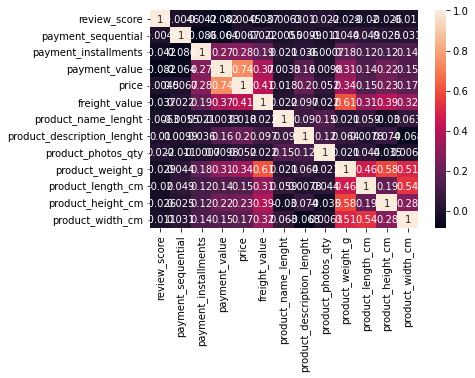

In [ ]:
sns.heatmap(raw[num_col].corr(),annot=True)
fig.set_size_inches(50, 30)
plt.show()

- payment_value - price ; 0.74 (솔직히 payment_value랑 price가 뭐가 다른지 몰게씀.. 거래가치가 뭔데 ...   
- freight_value - product_weight_g ; 0.61
- product_height_cm - product_weight_g ; 0.58
- product_width_cm - product_weight_g ; 0.51
- product_height_cm - product_width_cm ; 0.51

### 분포

In [ ]:
num_col

['review_score',
 'payment_sequential',
 'payment_installments',
 'payment_value',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

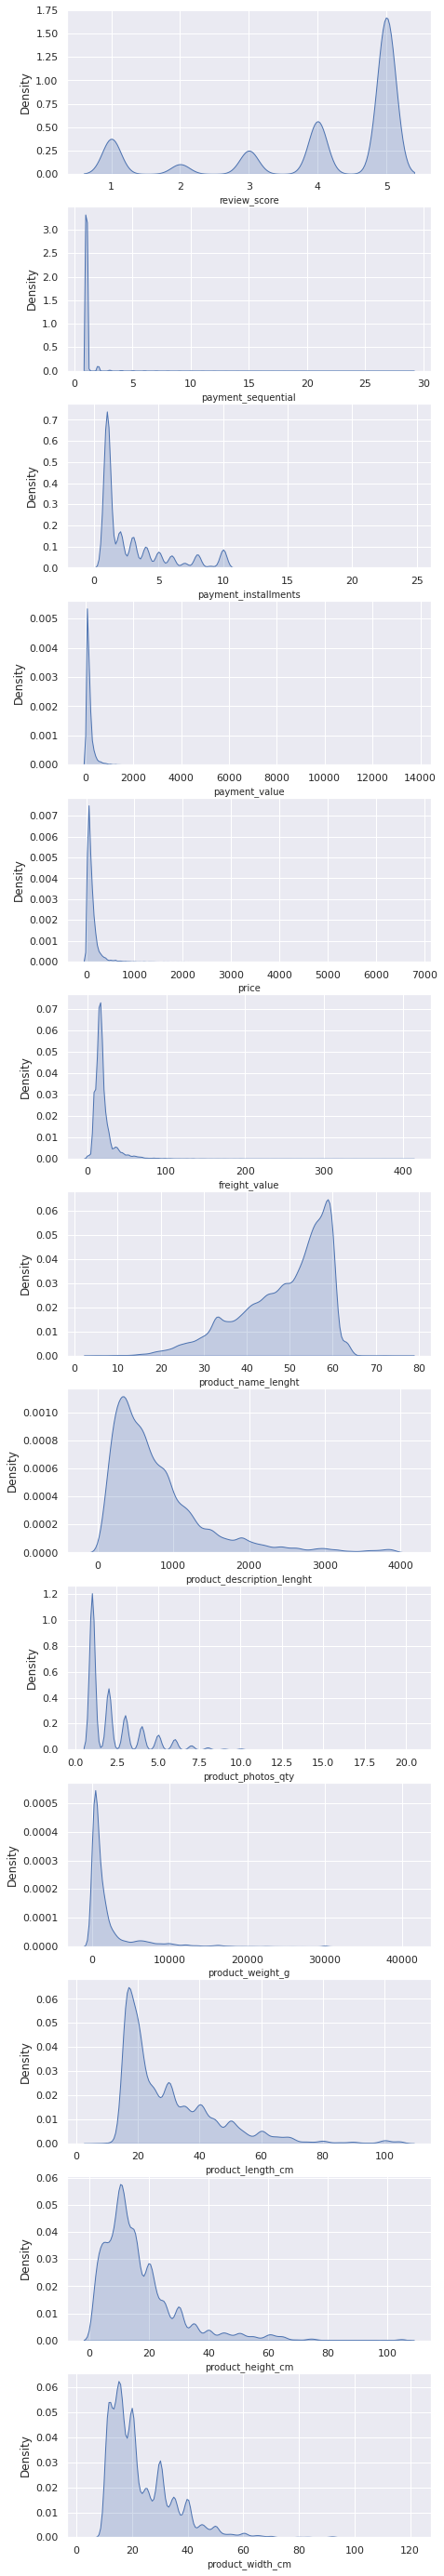

In [ ]:
sns.set(rc = {'figure.figsize':(7,50)})
fig, axes = plt.subplots(13, 1)
for i, colname in zip(range(len(num_col)), num_col):
    p = sns.kdeplot(data=raw, x = num_col[i], shade=True,ax=axes[i])
    p.set_xlabel(colname, fontsize = 10)

### 범주형 eda

In [ ]:
for i in obj_col:
    print("< ",i," >")
    print(raw[i].value_counts())
    print()
    print()

<  order_status  >
delivered      114859
shipped          1167
canceled          553
invoiced          370
processing        370
unavailable         7
approved            3
Name: order_status, dtype: int64


<  review_comment_title  >
Recomendo                 494
recomendo                 403
Bom                       331
super recomendo           310
Excelente                 293
                         ... 
Não entrega do produto      1
Recomendo totalmente        1
PÉSSIMO FORNECEDOR          1
problema com o relógio      1
NÃO CUMPRIU O PRAZO         1
Name: review_comment_title, Length: 4497, dtype: int64


<  review_comment_message  >
Muito bom                                                                                                                          259
Bom                                                                                                                                207
muito bom                                                                      

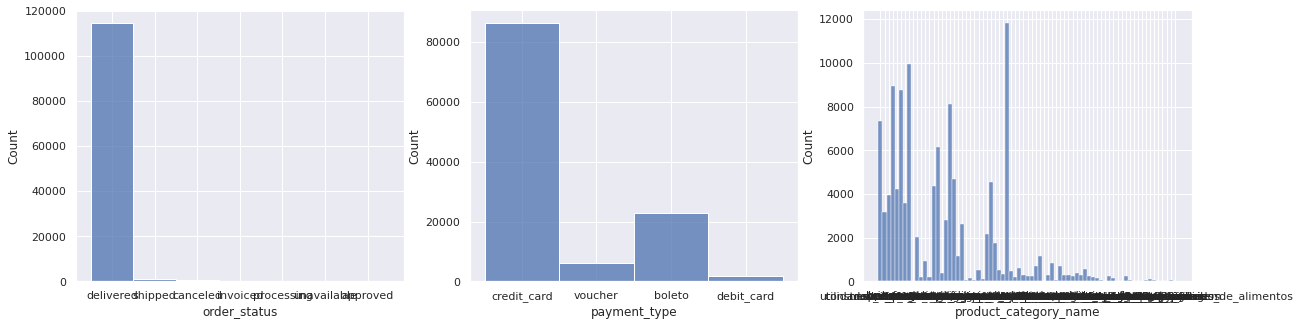

In [ ]:
col = ['order_status','payment_type','product_category_name']

sns.set(rc = {'figure.figsize':(20,5)})
fig, axes = plt.subplots(1, 3)
for i in range(3):
    g=sns.histplot(data=raw, x = col[i],ax=axes[i])

#### 지도 시각화
참고 : https://www.kaggle.com/code/andresionek/geospatial-analysis-of-brazilian-e-commerce#Where-does-most-revenue-comes-from?

- zip code 란?  
: 외국의 우편번호  
- zip code prefix 란?  
: 우편번호의 앞자리를 말함. 우편번호의 앞자리는 해당 지역을 대표하는 지역번호이며 일반적으로 특정 도시나 지역의 특정 구역을 식별함.  
예를들어 우리나라에선 5자리의 우편번호가 사용되며, 이 중에서 첫 3자리는 광역시, 도별을 대표하는 지역번호이며 나머지 2자리는 구나 동을 식별하는 구역번호임. 
- 브라질에선 4자리의 zip code prefix를 사용한다.
- 즉, 1자리 -> 4자리로 갈수록 브라질의 지역을 더 자세하게 나타냄

#### 브라질의 모든 zip code prefix 시각화

In [ ]:
geo = pd.read_csv("/content/drive/MyDrive/BOAZ_mini_prj/olist_geolocation_dataset.csv")

In [ ]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# 데이터 세트에 브라질 영역 밖에 있는 일부 이상치 좌표가 있습니다. 
# => 이상치 제거

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo = geo[geo.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo = geo[geo.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo = geo[geo.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo = geo[geo.geolocation_lng <=  -34.79314722]

In [ ]:
# 그런 다음 위도와 경도 좌표를 처리한 다음 Mercator x/y 좌표로 변환합니다.

from datashader.utils import lnglat_to_meters as webm
x, y = webm(geo.geolocation_lng, geo.geolocation_lat)
geo['x'] = pd.Series(x)
geo['y'] = pd.Series(y)

In [ ]:
geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,x,y
0,1037,-23.545621,-46.639292,sao paulo,SP,-5.191862e+06,-2.698137e+06
1,1046,-23.546081,-46.644820,sao paulo,SP,-5.192478e+06,-2.698193e+06
2,1046,-23.546129,-46.642951,sao paulo,SP,-5.192270e+06,-2.698199e+06
3,1041,-23.544392,-46.639499,sao paulo,SP,-5.191885e+06,-2.697988e+06
4,1035,-23.541578,-46.641607,sao paulo,SP,-5.192120e+06,-2.697646e+06


In [ ]:
geo['geolocation_zip_code_prefix'] = geo['geolocation_zip_code_prefix'].astype(str)

In [ ]:
geo['geolocation_zip_code_prefix_1_digits'] = geo['geolocation_zip_code_prefix'].str[0:1]
geo['geolocation_zip_code_prefix_2_digits'] = geo['geolocation_zip_code_prefix'].str[0:2]
geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix'].str[0:3]
geo['geolocation_zip_code_prefix_4_digits'] = geo['geolocation_zip_code_prefix'].str[0:4]

In [ ]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
brazil = geo
agg_name = 'geolocation_zip_code_prefix'

plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap=rainbow)
# 왜 안 나와...

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

In [ ]:
# plot wtih datashader - image with black background
import datashader as ds
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from IPython.core.display import HTML, display
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr

background = "black"
cm = partial(colormap_select, reverse=(background!="black"))
export = partial(export_image, background = background, export_path="export")
display(HTML("<style>.container { width:100% !important; }</style>"))
W = 700 

def create_map(data, cmap, data_agg, export_name='img'):
    pad = (data.x.max() - data.x.min())/50
    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad), 
                             (data.y.min() - pad, data.y.max() + pad))

    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])

    plot_width  = int(W)
    plot_height = int(plot_width * ratio)
    if ratio > 1.5:
        plot_height = 550
        plot_width = int(plot_height / ratio)
        
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

    agg = cvs.points(data, 'x', 'y', data_agg)
    img = tf.shade(agg, cmap=cmap, how='eq_hist')
    return export(img, export_name)

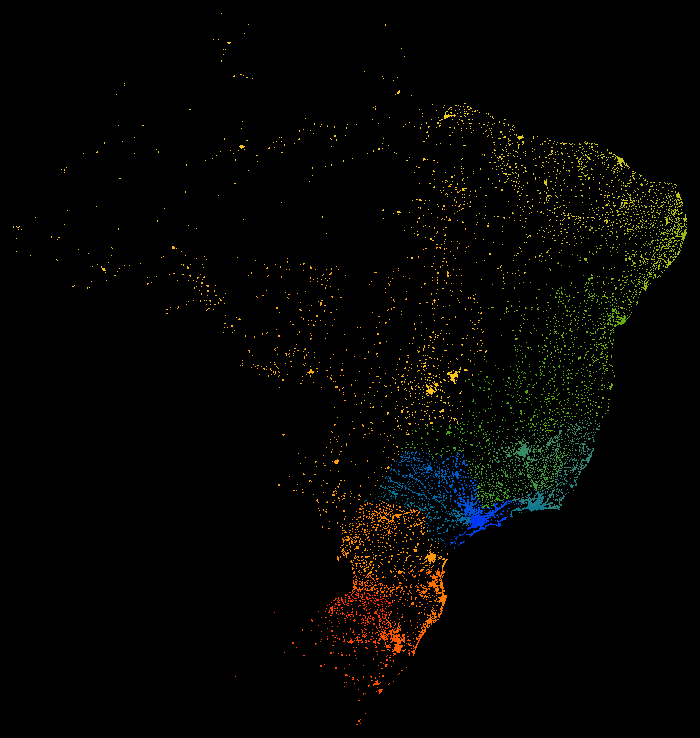

In [ ]:
create_map(brazil, rainbow, ds.mean(agg_name),'brazil_zip_codes')

#### 브라질에서 가장 수입이 많은 곳 (3 digit)

In [ ]:
raw['customer_zip_code_prefix']

0          3149
1          3149
2          3149
3          3366
4          2290
          ...  
117324     8528
117325    89111
117326    60455
117327    39803
117328     9687
Name: customer_zip_code_prefix, Length: 117329, dtype: int64

In [ ]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,x,y,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_3_digits,geolocation_zip_code_prefix_4_digits
0,1037,-23.545621,-46.639292,sao paulo,SP,-5.191862e+06,-2.698137e+06,1,10,103,1037
1,1046,-23.546081,-46.644820,sao paulo,SP,-5.192478e+06,-2.698193e+06,1,10,104,1046
2,1046,-23.546129,-46.642951,sao paulo,SP,-5.192270e+06,-2.698199e+06,1,10,104,1046
3,1041,-23.544392,-46.639499,sao paulo,SP,-5.191885e+06,-2.697988e+06,1,10,104,1041
4,1035,-23.541578,-46.641607,sao paulo,SP,-5.192120e+06,-2.697646e+06,1,10,103,1035
...,...,...,...,...,...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,-5.789805e+06,-3.257630e+06,9,99,999,9995
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,-5.813647e+06,-3.233491e+06,9,99,999,9990
1000160,99950,-28.071855,-52.014716,tapejara,RS,-5.790252e+06,-3.258036e+06,9,99,999,9995
1000161,99980,-28.388932,-51.846871,david canabarro,RS,-5.771567e+06,-3.298098e+06,9,99,999,9998


In [ ]:
raw['customer_zip_code_prefix'] = raw['customer_zip_code_prefix'].astype(str)

In [ ]:
raw['customer_zip_code_prefix_3_digits'] = raw['customer_zip_code_prefix'].str[0:3]
raw['customer_zip_code_prefix_3_digits'] = raw['customer_zip_code_prefix_3_digits'].astype(int)

geo['geolocation_zip_code_prefix_3_digits'] = geo['geolocation_zip_code_prefix_3_digits'].astype(int)
brazil_geo = geo.set_index('geolocation_zip_code_prefix_3_digits').copy()

In [ ]:
brazil_geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,x,y,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_4_digits
geolocation_zip_code_prefix_3_digits,,,,,,,,,,
103,1037,-23.545621,-46.639292,sao paulo,SP,-5.191862e+06,-2.698137e+06,1,10,1037
104,1046,-23.546081,-46.644820,sao paulo,SP,-5.192478e+06,-2.698193e+06,1,10,1046
104,1046,-23.546129,-46.642951,sao paulo,SP,-5.192270e+06,-2.698199e+06,1,10,1046
104,1041,-23.544392,-46.639499,sao paulo,SP,-5.191885e+06,-2.697988e+06,1,10,1041
103,1035,-23.541578,-46.641607,sao paulo,SP,-5.192120e+06,-2.697646e+06,1,10,1035
...,...,...,...,...,...,...,...,...,...,...
999,99950,-28.068639,-52.010705,tapejara,RS,-5.789805e+06,-3.257630e+06,9,99,9995
999,99900,-27.877125,-52.224882,getulio vargas,RS,-5.813647e+06,-3.233491e+06,9,99,9990
999,99950,-28.071855,-52.014716,tapejara,RS,-5.790252e+06,-3.258036e+06,9,99,9995


In [ ]:
gp = raw.groupby('customer_zip_code_prefix_3_digits')['price'].sum().to_frame()
# 판매한 item 가격의 합산으로 revenue(수익)을 계산함
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.price / 1000

In [ ]:
revenue

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,x,y,geolocation_zip_code_prefix_1_digits,geolocation_zip_code_prefix_2_digits,geolocation_zip_code_prefix_4_digits,price,revenue
100,1009,-23.546935,-46.636588,sao paulo,SP,-5.191561e+06,-2.698297e+06,1,10,1009,3585.82,3.58582
100,1009,-23.545430,-46.635715,sao paulo,SP,-5.191464e+06,-2.698114e+06,1,10,1009,3585.82,3.58582
100,1007,-23.550393,-46.637302,sao paulo,SP,-5.191641e+06,-2.698716e+06,1,10,1007,3585.82,3.58582
100,1005,-23.549819,-46.635606,sao paulo,SP,-5.191452e+06,-2.698647e+06,1,10,1005,3585.82,3.58582
100,1009,-23.545692,-46.635866,sao paulo,SP,-5.191481e+06,-2.698146e+06,1,10,1009,3585.82,3.58582
...,...,...,...,...,...,...,...,...,...,...,...,...
999,99950,-28.068639,-52.010705,tapejara,RS,-5.789805e+06,-3.257630e+06,9,99,9995,8679.49,8.67949
999,99900,-27.877125,-52.224882,getulio vargas,RS,-5.813647e+06,-3.233491e+06,9,99,9990,8679.49,8.67949
999,99950,-28.071855,-52.014716,tapejara,RS,-5.790252e+06,-3.258036e+06,9,99,9995,8679.49,8.67949
999,99980,-28.388932,-51.846871,david canabarro,RS,-5.771567e+06,-3.298098e+06,9,99,9998,8679.49,8.67949


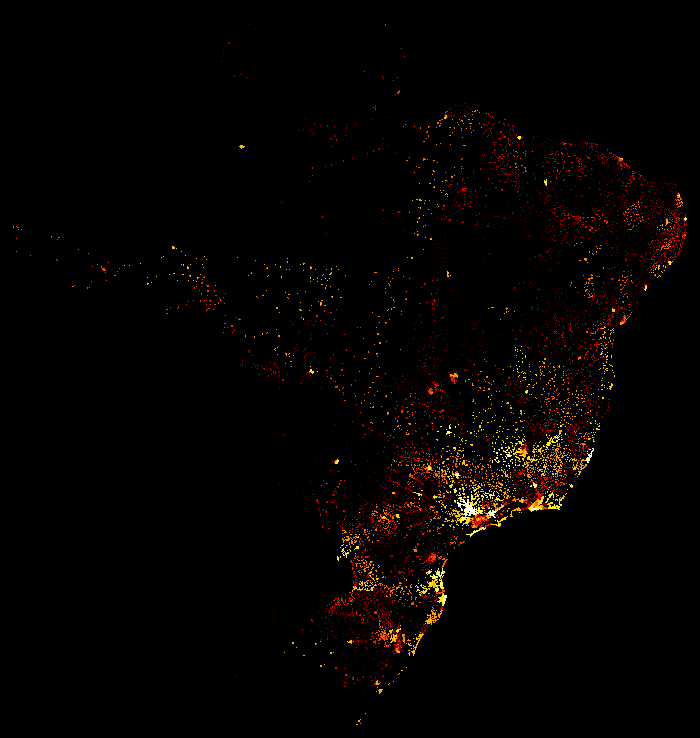

In [ ]:
create_map(revenue, fire, ds.mean(agg_name), 'revenue_brazil')

밝을수록 수입이 높은 것

![brazil](https://user-images.githubusercontent.com/105470134/220111813-88f2abad-8f37-4c9f-af1c-dd3932af907d.jpeg)

브라질의 중심지?? 같은 거같은데 위 수입지표와 일맥상통한 느낌

지도 시각화... 할 수 있는거 더 많을 것 같은데 시간이 없어서 여기까지...^^

### 시계열 그래프 그리기

하려고 했는데 ... 시간이 없어서... 못해쓰요 ...

## 결론

1. 전처리
    - 결측치 처리 : 리뷰 데이터 결측치는 분석에 크게 문제 없을 것 같음. 리뷰는 따로 nlp로 넘어갈거기때문에 다른 모델링에 사용될 데이터들과 독단적으로 사용될 거 가타서..ㅇㅇ 따른 결측치들은 대체하기 보다는 그냥 삭제하는 게 데이터 신뢰성 면에서 나을지도? 어차피 행수도 많고 !!
    - 이상치 처리 : 굳이?? 삭제할 필요 없다고 생각함. iqr로 임의로 정한 개념이고... 그냥 모델링 하다가 튜닝하면서 간 보는게 좋을듯
    - 다중공선성 : price랑 payment_value는 다중공선성의 문제가 충분히 야기될 수 있어서 모델링 시 유의해야할 듯
    - 추가 변수 생성 : 이거까진 시간이 없어서 생각하지 못해씀... ^--^;;
    - 또 머가이쓸까

2. 분석 진행방향 (insight)
    - 이런 비지니스 분석 프레임워크 사용한 프로젝트 해보고 싶었어서 그런거 찾아서 적용해보면 좋을 것 같음.   
    예를들어 3C 분석은 이러함 (우리 데이터에 잘 맞는듯?)  
    <img width="472" alt="스크린샷 2023-02-20 오후 10 14 31" src="https://user-images.githubusercontent.com/105470134/220118779-908588f7-fbb0-446a-891a-a4d74a6f6292.png">   
    참고 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=wipsmaster&logNo=50184872603
    - 리뷰로 nlp 감정분석하면 좋을 것 같음 (주제와 상관없을 수 있지만... 내가 해보고싶음)
    - 또 머가이쓸까
